In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
EXPERIMENT = 'Figure1_Position_Common_Scale'
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS_NEW/' + EXPERIMENT
print RESULTS_DIR

/n/regal/pfister_lab/PERCEPTION/RESULTS_NEW/Figure1_Position_Common_Scale


In [118]:
datasets = sorted(os.listdir(RESULTS_DIR))

results_per_dataset = [None]*len(datasets)

for d in datasets:

    classifiers = ['RF', 'RF_Image', 'MLP', 'LeNet', 'VGG19', 'Xception']

    msle = {}

    for c in classifiers:

        files = glob.glob(RESULTS_DIR + '/'+d+'/'+c+'/*_results.p')
        print 'Found', len(files), 'files for', c, 'on dataset', d

        mean_squared_log_errors = [0] * len(files)

        for file in files:

            index = int(file.split('_results')[0].split('_')[-1])
    #         print 'Loading file', index

            with open(file, 'r') as f:
                stats = pickle.load(f)

            log_error = sklearn.metrics.mean_squared_log_error(stats['y_test'], stats['y_pred'])
            mean_squared_log_errors[index] = log_error

        msle[c] = mean_squared_log_errors

    # order by classifier complexity
    labels = ['RandomForest', 'RandomForest Image', 'MLP', 'LeNet + MLP', 'VGG19 + MLP', 'Xception + MLP']
    values = [msle['RF'], msle['RF_Image'], msle['MLP'], msle['LeNet'], msle['VGG19'], msle['Xception']]

    results_per_dataset[int(d)-1] = (labels, values)
    

Found 40 files for RF on dataset 1
Found 40 files for RF_Image on dataset 1
Found 40 files for MLP on dataset 1
Found 40 files for LeNet on dataset 1
Found 40 files for VGG19 on dataset 1
Found 40 files for Xception on dataset 1
Found 40 files for RF on dataset 2
Found 29 files for RF_Image on dataset 2
Found 40 files for MLP on dataset 2
Found 40 files for LeNet on dataset 2
Found 40 files for VGG19 on dataset 2
Found 40 files for Xception on dataset 2
Found 40 files for RF on dataset 3
Found 6 files for RF_Image on dataset 3
Found 40 files for MLP on dataset 3
Found 40 files for LeNet on dataset 3
Found 40 files for VGG19 on dataset 3
Found 40 files for Xception on dataset 3


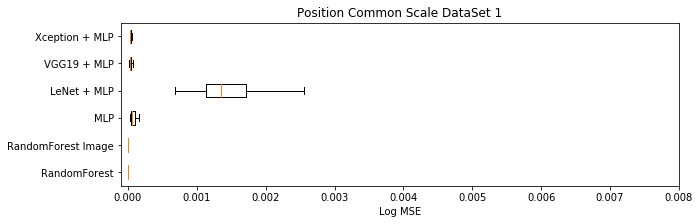

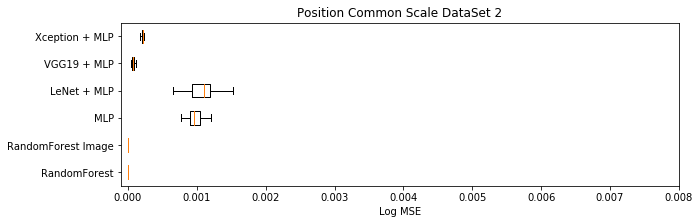

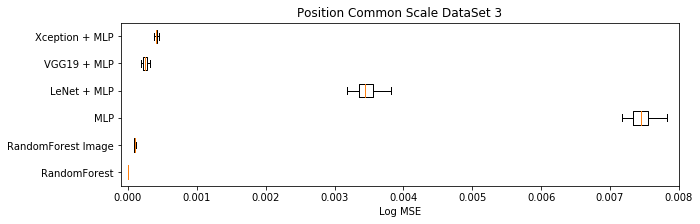

In [121]:

for i,r in enumerate(results_per_dataset):
    
    plt.figure(figsize=(10,3))
    plt.title('Position Common Scale DataSet ' + str(i+1))
    plt.xlabel('Classifier')
    plt.xlabel('Log MSE')
    plt.xlim(-.0001, 0.008)

    boxplot = plt.boxplot(r[1], vert=False, notch=False, labels=r[0], showfliers=False)


In [122]:
datasets = sorted(os.listdir(RESULTS_DIR))

epoch_results_per_dataset = [None]*len(datasets)

for d in datasets:

    classifiers = ['RF', 'RF_Image', 'MLP', 'LeNet', 'VGG19', 'Xception']

    mse = {}
    val_mse = {}
    
    for c in classifiers:
        
        if c.startswith('RF'):
            continue

        files = glob.glob(RESULTS_DIR + '/'+d+'/'+c+'/*_results.p')
        print 'Found', len(files), 'files for', c, 'on dataset', d

        mse_per_epochs = [0] * len(files)
        val_mse_per_epochs = [0] * len(files)

        for file in files:

            index = int(file.split('_results')[0].split('_')[-1])
    #         print 'Loading file', index

            with open(file, 'r') as f:
                stats = pickle.load(f)

            mse_per_epoch = stats['mean_squared_error']
            val_mse_per_epoch = stats['val_mean_squared_error']

            mse_per_epochs[index] = mse_per_epoch
            val_mse_per_epochs[index] = val_mse_per_epoch

        mse[c] = np.mean(mse_per_epochs, axis=0)
        val_mse[c] = np.mean(val_mse_per_epochs, axis=0)

    # order by classifier complexity

    epoch_results_per_dataset[int(d)-1] = (mse, val_mse)
    

Found 40 files for MLP on dataset 1
Found 40 files for LeNet on dataset 1
Found 40 files for VGG19 on dataset 1
Found 40 files for Xception on dataset 1
Found 40 files for MLP on dataset 2
Found 40 files for LeNet on dataset 2
Found 40 files for VGG19 on dataset 2
Found 40 files for Xception on dataset 2
Found 40 files for MLP on dataset 3
Found 40 files for LeNet on dataset 3
Found 40 files for VGG19 on dataset 3
Found 40 files for Xception on dataset 3


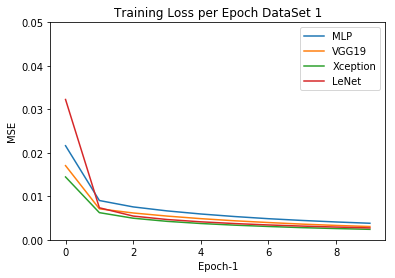

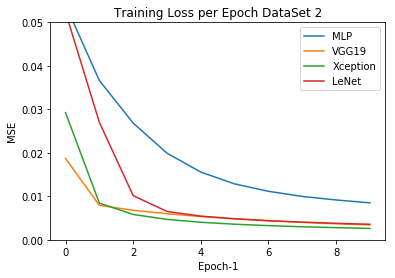

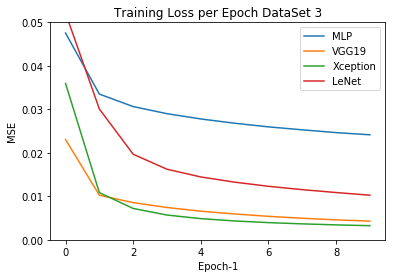

In [127]:
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][0]
    plt.figure()
    for e in all_mse:

        plt.title('Training Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch-1')
        plt.ylim(0,0.05)
        plot(all_mse[e], label=e)
        plt.legend()


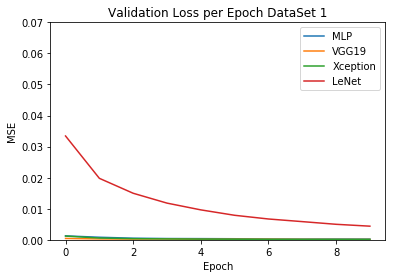

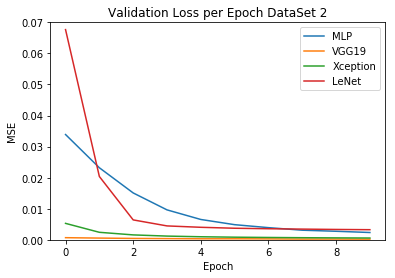

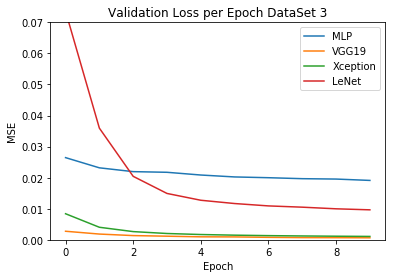

In [128]:
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][1]
    plt.figure()
    for e in all_mse:

        plt.title('Validation Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.ylim(0, 0.07)
        plot(all_mse[e], label=e)
        plt.legend()

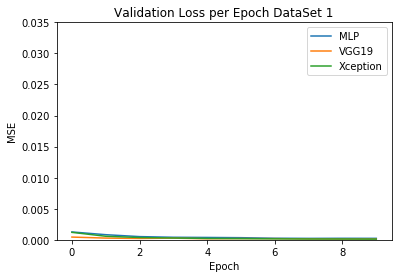

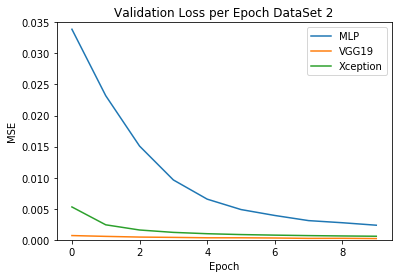

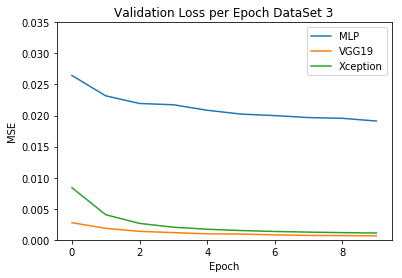

In [129]:
#
# WITHOUT LENET
#
for d in datasets: 

    all_mse = epoch_results_per_dataset[int(d)-1][1]
    plt.figure()
    for e in all_mse:

        if e == 'LeNet':
            continue
        
        plt.title('Validation Loss per Epoch DataSet ' + d)
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.ylim(0,0.035)
        plot(all_mse[e], label=e)
        plt.legend()